# 서울지역 5대 강력범죄 데이터 분석

### 데이터 출처 : http://data.go.kr

## 사용 기술
- jupyter(python 3.5)
- numpy
- pandas
- matplotlib
- seaborn
- folium
- google api ( google maps geocoding )
## Purpose
서울시 각 구별로 발생한 범죄에 대해 각 지역별 범죄율, 검거율에 대한 순위를 나타내고 지리학적 위치와 데이터를 융합해 데이터 시각화한다.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import platform

In [2]:
from matplotlib import font_manager, rc

%matplotlib inline

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print('Unknown system')

In [3]:
frame = pd.read_csv('dataset/seoul_crime_2015.csv',encoding='euc-kr')
frame.head()

,관서명,살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거),절도(발생),절도(검거),폭력(발생),폭력(검거)
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170"
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070"
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711"
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861


data type이 text인 데이터를 int로 변경한다.

In [4]:
for tuple in frame.values:
    for ele in tuple[-1:-4:-1]:
        ele.replace(',','')
textData = frame[frame.columns[-4:]].values
for idx,row in enumerate(textData):
    for idx2,ele in enumerate(row):
        textData[idx][idx2] = int(ele.replace(',',''))
textData
frame[frame.columns[-4:]] = textData
frame.head()

,관서명,살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거),절도(발생),절도(검거),폭력(발생),폭력(검거)
0,중부서,2,2,3,2,105,65,1395,477,1355,1170
1,종로서,3,3,6,5,115,98,1070,413,1278,1070
2,남대문서,1,0,6,4,65,46,1153,382,869,794
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711
4,혜화서,3,2,5,4,96,63,1114,424,1015,861


### 각 경찰서별 발생한 범죄(발생),범죄(검거)의 추가적인 column을 만든다.

In [5]:
frame['소계(발생)'] = frame['살인(발생)'] + frame['강도(발생)'] + frame['강간(발생)'] + frame['절도(발생)'] + frame['폭력(발생)']
frame['소계(검거)'] = frame['살인(검거)'] + frame['강도(검거)'] + frame['강간(검거)'] + frame['절도(검거)'] + frame['폭력(검거)']
frame.head()

,관서명,살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거),절도(발생),절도(검거),폭력(발생),폭력(검거),소계(발생),소계(검거)
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,2860,1716
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,2472,1589
2,남대문서,1,0,6,4,65,46,1153,382,869,794,2094,1226
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,4029,2579
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,2233,1354


### 경찰서가 위치한 '구'에 대한 mapping

In [6]:
policeToArea = {'서대문서': '서대문구', '수서서': '강남구', '강서서': '강서구', '서초서': '서초구',
                '서부서': '은평구', '중부서': '중구', '종로서': '종로구', '남대문서': '중구',
                '혜화서': '종로구', '용산서': '용산구', '성북서': '성북구', '동대문서': '동대문구',
                '마포서': '마포구', '영등포서': '영등포구', '성동서': '성동구', '동작서': '동작구',
                '광진서': '광진구', '강북서': '강북구', '금천서': '금천구', '중랑서': '중랑구',
                '강남서': '강남구', '관악서': '관악구', '강동서': '강동구', '종암서': '성북구', 
                '구로서': '구로구', '양천서': '양천구', '송파서': '송파구', '노원서': '노원구', 
                '방배서': '서초구', '은평서': '은평구', '도봉서': '도봉구'}

frame['구별'] = frame['관서명'].apply(lambda v:policeToArea.get(v, v))
frame.sort_values(by='구별').head()

,관서명,살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거),절도(발생),절도(검거),폭력(발생),폭력(검거),소계(발생),소계(검거),구별
30,수서서,10,7,6,6,149,124,1439,666,1819,1559,3423,2362,강남구
17,강남서,3,3,15,12,300,225,2411,984,2465,2146,5194,3370,강남구
20,강동서,4,3,6,8,156,123,2366,789,2712,2248,5244,3171,강동구
14,강북서,7,8,14,13,153,126,1434,618,2649,2348,4257,3113,강북구
19,강서서,7,8,13,13,262,191,2096,1260,3207,2718,5585,4190,강서구


위 데이터에서 알 수 있듯이 대개 한 구 에는 하나의 경찰서가 존재하지만 유동인구가 많은 지역은 2개이상의 경찰서가 존재 할 수 있다.
'수서서','강남서'의 경우 동일하게 '강남구'에 위치한 경찰서로써 구별로 데이터를 구분짓고자 할때 두 data tuple간의 데이터를 합할 필요가 있다.

In [7]:
frame_by_gu = pd.pivot_table(frame, index='구별', aggfunc=np.sum)
frame_by_gu.head()

,강간(검거),강간(발생),강도(검거),강도(발생),살인(검거),살인(발생),소계(검거),소계(발생),절도(검거),절도(발생),폭력(검거),폭력(발생)
구별,,,,,,,,,,,,
강남구,349,449,18,21,10,13,5732,8617,1650,3850,3705,4284
강동구,123,156,8,6,3,4,3171,5244,789,2366,2248,2712
강북구,126,153,13,14,8,7,3113,4257,618,1434,2348,2649
강서구,191,262,13,13,8,7,4190,5585,1260,2096,2718,3207
관악구,221,320,14,12,8,9,3712,6345,827,2706,2642,3298


### Attribute Combination
각 관서별 발생한 범죄의 검거횟수의 절대량보다 '발생된 범죄횟수 대비 검거율'이 더 유의미한 지표이므로 이에 대한 attiribute를 아래와 같이 만든다.

In [8]:
frame_by_gu['강간검거율'] = frame_by_gu['강간(검거)']/frame_by_gu['강간(발생)']*100
frame_by_gu['강도검거율'] = frame_by_gu['강도(검거)']/frame_by_gu['강도(발생)']*100
frame_by_gu['살인검거율'] = frame_by_gu['살인(검거)']/frame_by_gu['살인(발생)']*100
frame_by_gu['절도검거율'] = frame_by_gu['절도(검거)']/frame_by_gu['절도(발생)']*100
frame_by_gu['폭력검거율'] = frame_by_gu['폭력(검거)']/frame_by_gu['폭력(발생)']*100
frame_by_gu['검거율'] = frame_by_gu['소계(검거)']/frame_by_gu['소계(발생)']*100

del frame_by_gu['강간(검거)']
del frame_by_gu['강도(검거)']
del frame_by_gu['살인(검거)']
del frame_by_gu['절도(검거)']
del frame_by_gu['폭력(검거)']

frame_by_gu.head()

,강간(발생),강도(발생),살인(발생),소계(검거),소계(발생),절도(발생),폭력(발생),강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율
구별,,,,,,,,,,,,,
강남구,449,21,13,5732,8617,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594,66.519670
강동구,156,6,4,3171,5244,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855,60.469108
강북구,153,14,7,3113,4257,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222,73.126615
강서구,262,13,7,4190,5585,2096,3207,72.900763,100.000000,114.285714,60.114504,84.752105,75.022381
관악구,320,12,9,3712,6345,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157,58.502758


위 dataframe에서 검거율이 100% 를 초과한 값이 존재하는데 이는 작년에 발생한 범죄에 대해 다음해에 검거하게되는 경우 발생할 수 있는 값이다.<br/> 100%이상인 값을 100%로 고정시켜 데이터를 다듬든다.

In [9]:
frame_by_gu[frame_by_gu[['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']] > 100] = 100
frame_by_gu.head(10)

,강간(발생),강도(발생),살인(발생),소계(검거),소계(발생),절도(발생),폭력(발생),강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율
구별,,,,,,,,,,,,,
강남구,449,21,13,5732,8617,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594,66.519670
강동구,156,6,4,3171,5244,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855,60.469108
강북구,153,14,7,3113,4257,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222,73.126615
강서구,262,13,7,4190,5585,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105,75.022381
관악구,320,12,9,3712,6345,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157,58.502758
광진구,240,14,4,3707,5909,3026,2625,91.666667,100.000000,100.000000,42.200925,83.047619,62.734811
구로구,281,15,8,3502,5646,2335,3007,58.362989,73.333333,75.000000,38.072805,80.877951,62.026213
금천구,151,6,3,2796,3781,1567,2054,80.794702,100.000000,100.000000,56.668794,86.465433,73.948691
노원구,197,7,10,3268,5130,2193,2723,61.421320,100.000000,100.000000,36.525308,85.530665,63.703704


### Rename Columns
데이터 분석에 필요한 속성만을 얻고 ( feature reduction ) 속성의 이름을 재설정한다.

In [10]:
frame_by_gu.rename(columns = {'강간(발생)':'강간', 
                       '강도(발생)':'강도', 
                       '살인(발생)':'살인', 
                       '절도(발생)':'절도', 
                       '폭력(발생)':'폭력'}, inplace=True)
#del frame_by_gu['소계(발생)']
del frame_by_gu['소계(검거)']

frame_by_gu.head()

,강간,강도,살인,소계(발생),절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율
구별,,,,,,,,,,,,
강남구,449,21,13,8617,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594,66.519670
강동구,156,6,4,5244,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855,60.469108
강북구,153,14,7,4257,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222,73.126615
강서구,262,13,7,5585,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105,75.022381
관악구,320,12,9,6345,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157,58.502758


### Dataset Join
위 dataset에 구별 '인구수' 속성을 추가시키기 위해서 seoul_population.csv dataset을 통해 각 구별 인구수에 대한 데이터를 추가시킨다.
두 dataset간 index가 '구'의 이름으로 일치한다.

In [11]:
popuation = pd.read_csv('dataset/seoul_population.csv',index_col='구별')
popuation.head()

,인구수
구별,
강남구,581760
강동구,463321
강북구,334426
강서구,595691
관악구,529031


In [12]:
frame_by_gu = frame_by_gu.join(popuation)
frame_by_gu.head()

,강간,강도,살인,소계(발생),절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율,인구수
구별,,,,,,,,,,,,,
강남구,449,21,13,8617,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594,66.519670,581760
강동구,156,6,4,5244,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855,60.469108,463321
강북구,153,14,7,4257,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222,73.126615,334426
강서구,262,13,7,5585,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105,75.022381,595691
관악구,320,12,9,6345,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157,58.502758,529031


### 최대 검거율을 보이는 지역 Best 5

In [13]:
frame_by_gu.sort_values(by='검거율',ascending=False).head(5)

,강간,강도,살인,소계(발생),절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율,인구수
구별,,,,,,,,,,,,,
강서구,262,13,7,5585,2096,3207,72.900763,100.000000,100.0,60.114504,84.752105,75.022381,595691
금천구,151,6,3,3781,1567,2054,80.794702,100.000000,100.0,56.668794,86.465433,73.948691,256167
강북구,153,14,7,4257,1434,2649,82.352941,92.857143,100.0,43.096234,88.637222,73.126615,334426
도봉구,102,9,3,2664,1063,1487,100.000000,100.000000,100.0,44.967074,87.626093,71.321321,353241
동대문구,173,13,5,4720,1981,2548,84.393064,100.000000,100.0,41.090358,87.401884,67.902542,373824


## 인구수 대비 범죄 발생율 ( 소계(발생) per 인구수 ) Best 5

In [14]:
frame_by_gu['범죄/인구수'] = frame_by_gu['소계(발생)'] / frame_by_gu['인구수']
frame_by_gu.sort_values(by='범죄/인구수',ascending=False).head()

,강간,강도,살인,소계(발생),절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율,인구수,범죄/인구수
구별,,,,,,,,,,,,,,
중구,170,9,3,4954,2548,2224,65.294118,66.666667,66.666667,33.712716,88.309353,59.386354,134329,0.036880
종로구,211,11,6,4705,2184,2293,76.303318,81.818182,83.333333,38.324176,84.212822,62.550478,163822,0.028720
영등포구,295,22,14,6867,2964,3572,62.033898,90.909091,85.714286,32.995951,82.894737,60.492209,417811,0.016436
광진구,240,14,4,5909,3026,2625,91.666667,100.000000,100.000000,42.200925,83.047619,62.734811,375180,0.015750
용산구,194,14,5,3820,1557,2050,89.175258,100.000000,100.000000,37.700706,83.121951,65.000000,247909,0.015409


## Data Visualization
각 구별로 범죄상황에 대해 시각화 <br/>
['강간','강도','살인','절도','폭력'] 속성에 대해서는 각 값이 절대량을 나타내는 값이므로 시각화를 위해 각 속성별로 Normailization 하여 [0,1]로 값을 변경한다. ( data transformation )

### Normailization

In [15]:
target_col = ['강간', '강도', '살인', '절도', '폭력','소계(발생)']
max_column = frame_by_gu[target_col].max() # vector
min_column = frame_by_gu[target_col].min()
crime_count_norm = (frame_by_gu[target_col] - min_column)/max_column
crime_count_norm.sort_values(by='소계(발생)',ascending=False).head()

,강간,강도,살인,절도,폭력,소계(발생)
구별,,,,,,
강남구,0.772829,0.727273,0.785714,0.723896,0.652894,0.690844
영등포구,0.429844,0.772727,0.857143,0.493766,0.486695,0.487757
송파구,0.262806,0.363636,0.642857,0.565195,0.422035,0.477428
관악구,0.485523,0.318182,0.500000,0.426753,0.422736,0.427179
광진구,0.307350,0.409091,0.142857,0.509870,0.265640,0.376581


### Data Visualization 1 : 서울시 각 구별 범죄발생률

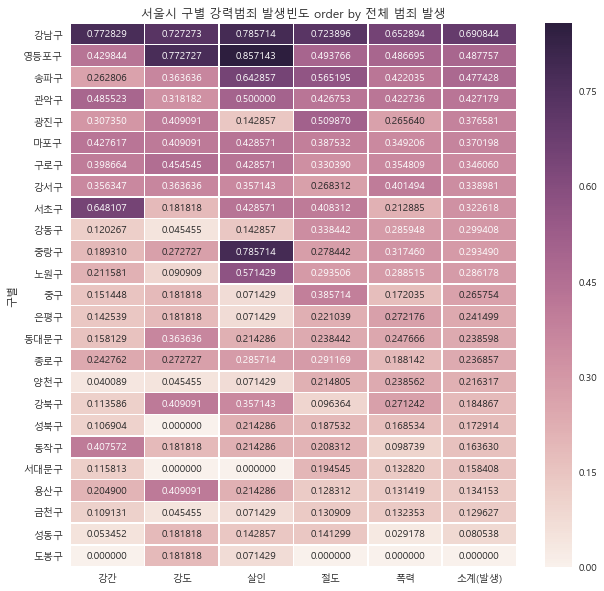

In [16]:
plt.figure(figsize = (10,10))
sns.heatmap(crime_count_norm.sort_values(by='소계(발생)', ascending=False), annot=True, fmt='f', linewidths=.5)
plt.title('서울시 구별 강력범죄 발생빈도')
plt.show()


## Data Visualization 2 : 서울시 구별 인구수 대비 범죄율

In [21]:
target_col = ['강간', '강도', '살인', '절도', '폭력','소계(발생)']
frame_temp = frame_by_gu[target_col].div(frame_by_gu['인구수'],axis=0)
max_column = frame_temp.max() # vector
min_column = frame_temp.min()
crime_count_norm = (frame_temp - min_column)/max_column
crime_count_norm.head()

,강간,강도,살인,절도,폭력,소계(발생)
구별,,,,,,
강남구,0.408703,0.379011,0.447146,0.190242,0.190517,0.197138
강동구,0.070891,0.034279,0.072740,0.110570,0.099285,0.102406
강북구,0.164681,0.464875,0.408522,0.067411,0.224170,0.140665
강서구,0.150958,0.166430,0.157865,0.026851,0.070914,0.049731
관악구,0.279107,0.179232,0.301515,0.111013,0.122276,0.120718


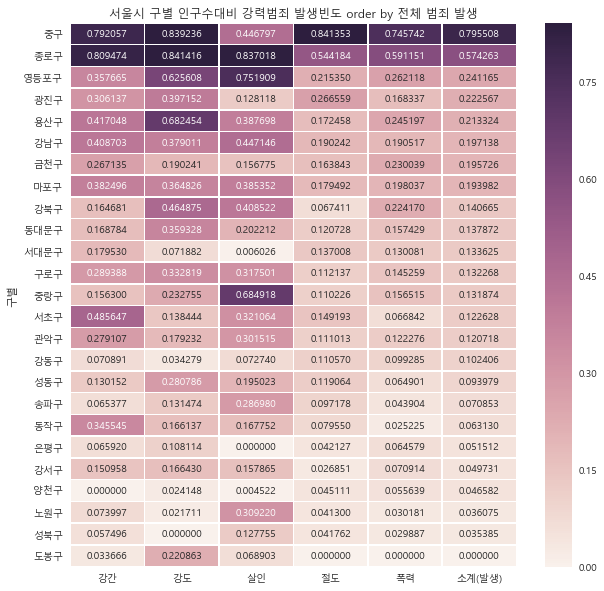

In [22]:
plt.figure(figsize = (10,10))
sns.heatmap(crime_count_norm.sort_values(by='소계(발생)', ascending=False), annot=True, fmt='f', linewidths=.5)
plt.title('서울시 구별 인구수대비 강력범죄 발생빈도')
plt.show()

## folium
- python 라이브러리로 실제 지리학적 정보 시각화에 유용한 도구
- 프로젝트에서 사용된 json파일은 서울시 부분만 추려내었음.
- json파일의 각 id가 위 pd.DataFrame의 index와 일치

## Data Visualization 3 : 각 구별 살인 횟수
- Attribute '살인' 사용

In [26]:
import json
import folium
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

geo_path = 'dataset/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_str = geo_str,
               data = frame_by_gu['살인'],
               columns = [frame_by_gu.index, frame_by_gu['살인']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')
map

![img3](/img/img3.png)

## Data Visualization 4 : 각 구별 검거율

In [28]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_str = geo_str,
               data = frame_by_gu['검거율'],
               columns = [frame_by_gu.index, frame_by_gu['검거율']],
               fill_color = 'YlGnBu', #PuRd, YlGnBu
               key_on = 'feature.id')
map


![img4](/img/img4.png)

## Data Visualization 5 : 각 경찰서별 검거율
- Google지도 API

In [29]:
frame.head()

,관서명,살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거),절도(발생),절도(검거),폭력(발생),폭력(검거),소계(발생),소계(검거),구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,2860,1716,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,2472,1589,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,2094,1226,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,4029,2579,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,2233,1354,종로구


- google API 사용을 위한 각 경찰서 이름을 가진 배열을 얻는다.

In [30]:
station_name = []

for name in frame['관서명']:
    station_name.append('서울'+str(name[:-1])+'경찰서')

station_name

['서울중부경찰서',
 '서울종로경찰서',
 '서울남대문경찰서',
 '서울서대문경찰서',
 '서울혜화경찰서',
 '서울용산경찰서',
 '서울성북경찰서',
 '서울동대문경찰서',
 '서울마포경찰서',
 '서울영등포경찰서',
 '서울성동경찰서',
 '서울동작경찰서',
 '서울광진경찰서',
 '서울서부경찰서',
 '서울강북경찰서',
 '서울금천경찰서',
 '서울중랑경찰서',
 '서울강남경찰서',
 '서울관악경찰서',
 '서울강서경찰서',
 '서울강동경찰서',
 '서울종암경찰서',
 '서울구로경찰서',
 '서울서초경찰서',
 '서울양천경찰서',
 '서울송파경찰서',
 '서울노원경찰서',
 '서울방배경찰서',
 '서울은평경찰서',
 '서울도봉경찰서',
 '서울수서경찰서']

In [32]:
frame['경찰서'] = station_name
frame['검거율'] = frame['소계(검거)']/frame['소계(발생)']*100
frame.head()

,관서명,살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거),절도(발생),절도(검거),폭력(발생),폭력(검거),소계(발생),소계(검거),구별,경찰서,검거율
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,2860,1716,중구,서울중부경찰서,60.000000
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,2472,1589,종로구,서울종로경찰서,64.279935
2,남대문서,1,0,6,4,65,46,1153,382,869,794,2094,1226,중구,서울남대문경찰서,58.548233
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,4029,2579,서대문구,서울서대문경찰서,64.010921
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,2233,1354,종로구,서울혜화경찰서,60.635916


- 각 경찰서별로 높은 검거율에 'score'개념을 도입, 각 data 별 'score'를 추산 > 데이터 시각화에 사용.

In [35]:
def reRange(x, oldMin, oldMax, newMin, newMax):
    return (x - oldMin)*(newMax - newMin) / (oldMax - oldMin) + newMin

frame['점수'] = reRange(frame['검거율'], min(frame['검거율']), max(frame['검거율']), 1, 100)
frame.sort_values(by='점수',ascending=False).head()

,관서명,살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거),절도(발생),절도(검거),폭력(발생),폭력(검거),소계(발생),소계(검거),구별,경찰서,검거율,점수
19,강서서,7,8,13,13,262,191,2096,1260,3207,2718,5585,4190,강서구,서울강서경찰서,75.022381,100.000000
15,금천서,3,4,6,6,151,122,1567,888,2054,1776,3781,2796,금천구,서울금천경찰서,73.948691,93.618196
14,강북서,7,8,14,13,153,126,1434,618,2649,2348,4257,3113,강북구,서울강북경찰서,73.126615,88.731940
29,도봉서,3,3,9,10,102,106,1063,478,1487,1303,2664,1900,도봉구,서울도봉경찰서,71.321321,78.001632
30,수서서,10,7,6,6,149,124,1439,666,1819,1559,3423,2362,강남구,서울수서경찰서,69.003798,64.226731


### google API, google maps를 사용하여 dataframe에 각 경찰서의 위도,경도 데이터를 추가

In [38]:
import googlemaps
gmaps = googlemaps.Client(key="--google api key--")

lat = []
lng = []

for name in frame['경찰서']:
    tmpMap = gmaps.geocode(name)
    tmpLoc = tmpMap[0].get('geometry')
    lat.append(tmpLoc['location']['lat'])
    lng.append(tmpLoc['location']['lng'])
    
frame['lat'] = lat
frame['lng'] = lng

frame.head()

,관서명,살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거),절도(발생),절도(검거),폭력(발생),폭력(검거),소계(발생),소계(검거),구별,경찰서,검거율,점수,lat,lng
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,2860,1716,중구,서울중부경찰서,60.000000,10.709938,37.563646,126.989580
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,2472,1589,종로구,서울종로경찰서,64.279935,36.149027,37.575534,126.984858
2,남대문서,1,0,6,4,65,46,1153,382,869,794,2094,1226,중구,서울남대문경찰서,58.548233,2.080923,37.554758,126.973498
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,4029,2579,서대문구,서울서대문경찰서,64.010921,34.550058,37.564785,126.966776
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,2233,1354,종로구,서울혜화경찰서,60.635916,14.489696,37.571840,126.998856


In [41]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for n in frame.index:
    folium.CircleMarker([frame['lat'][n], frame['lng'][n]], radius=frame['점수'][n]*25, 
                        color='#3186cc', fill_color='#3186cc').add_to(map)
    
map

![img5](/img/img5.png)

### Data Visualization 6 : 각 구별 살인 & 경찰서별 검거율

In [44]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

map.choropleth(geo_str = geo_str,
               data = frame_by_gu['살인'],
               columns = [frame_by_gu.index, frame_by_gu['살인']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')

for n in frame.index:
    folium.CircleMarker([frame['lat'][n], frame['lng'][n]], radius=frame['점수'][n]*25, 
                        color='#3186cc', fill_color='#3186cc').add_to(map)
    
map

![img6](/img/img6.png)

## 데이터 분석 결과
각 구별 범죄상황을 시각화 해보면, 강남3구 지역의 범죄발생빈도가 무척 높아 안전에 대해 유의할 필요성이 있다.
강남구 소재에 위치한 경찰서의 검거율은 타 구의 경찰서에 비해 높은편이 아니므로 경찰청 관할로 해당 지역구 치안에 좀 더 신경쓸 필요가 있다.